## Free Fermion one particle density matrix

This code tries to calculate (3)-(13) in PRA 72, 013604(2005). The string operator is not included yet, therefore this is a pure free fermion calculation. We put <Nparticles> into <Nsites>. By calculating $P$ and $P^{\prime}$ we can get Green's function and then one particle density matrix $\rho_{ij}$.

In [108]:
using Plots
using DelimitedFiles
using LaTeXStrings
using LinearAlgebra
using Statistics
using PyPlot
pyplot()

Plots.PyPlotBackend()

### Set up the basis and Hamiltonian: a PCB non-interacting Hamiltonian

In [123]:
Nsites = 4000;                          # Actual number of physical sites is half this, we encode particle types at different sites
Nparticles = 30;                    

In [124]:
Hamiltonian=zeros((Nsites,Nsites))
for i in 1:Nsites
    Hamiltonian[i,mod(i,Nsites)+1]=-1
end
Hamiltonian=Hamiltonian+Transpose(Hamiltonian)
P=eigen(Hamiltonian).vectors[:,1:Nparticles];

In [125]:
function ρij(P,i,j)
    fidag=zeros(Nsites);fjdag=zeros(Nsites)
    fidag[i]=1;fjdag[j]=1
    Pi=hcat(P,fidag)
    for m in 1:(i-1)
        for n in 1:Nparticles
            Pi[m,n]=-Pi[m,n]
        end
    end

    Pj=hcat(P,fjdag)
    for m in 1:(j-1)
        for n in 1:Nparticles
            Pj[m,n]=-Pj[m,n]
        end
    end

    PP=zeros(ComplexF64,Nparticles+1,Nparticles+1);
    mul!(PP,adjoint(Pi),Pj)
    Gij=det(PP)
    ρij=Gij
    if i==j
        ρij=1-Gij
    end
    return(ρij)
end

ρij (generic function with 1 method)

In [126]:
ρ0j=zeros(ComplexF64,Nsites);
[ρ0j[j]=ρij(P,1,j) for j in 1:Nsites];

#Since this system is periodic, we fix '0' the first site as our i and only change j. The Fourier transform is performed versus j.

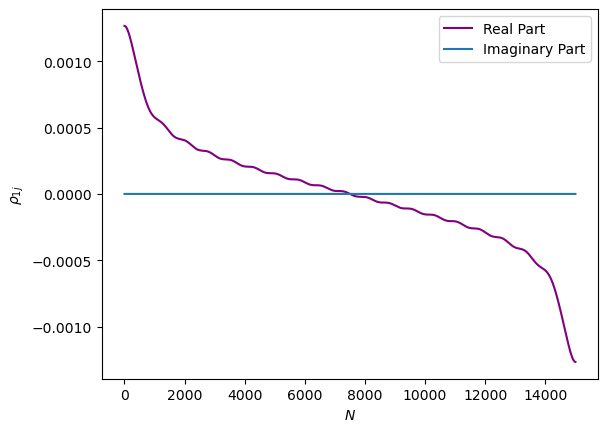

PyObject <matplotlib.legend.Legend object at 0x0000000001F2CB50>

In [114]:
x = 1:1:Nsites
y = real.(ρ0j)
z =imag.(ρ0j)
line1=PyPlot.plot(x, y,label="sdsdsds",color=:purple)
line2=PyPlot.plot(x, z)
PyPlot.ylabel(L"\rho_{1j}")
PyPlot.xlabel(L"N")

legend(["Real Part", "Imaginary Part"])


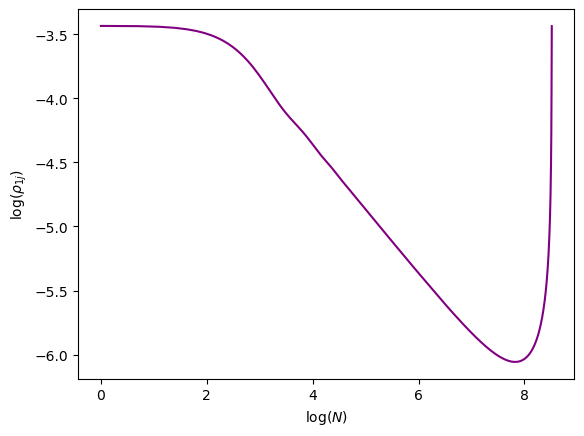

-0.519997544730234

In [95]:
x = log.(1:1:Nsites)
y = log.(real.(ρ0j))
line1=PyPlot.plot(x, y,label="sdsdsds",color=:purple)
PyPlot.ylabel(L"\log(\rho_{1j})")
PyPlot.xlabel(L"\log(N)")

(log(real(ρ0j[150])/real(ρ0j[20])))/(log(150/20))

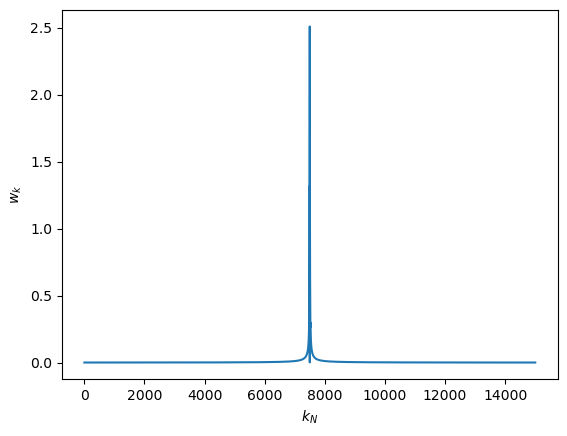

PyObject Text(0.5, 27.4, '$k_N$')

In [115]:
wk=zeros(ComplexF64,Nsites)
for ki in 1:1:Nsites
    wk[ki]=sum([exp(-1im*2*pi/Nsites*(ki-Nsites/2)*n)*ρ0j[n] for n in 1:Nsites])
end

x = 1:1:Nsites
y = abs.(wk)

PyPlot.plot(x, y)
PyPlot.ylabel(L"w_{k}")
PyPlot.xlabel(L"k_N")

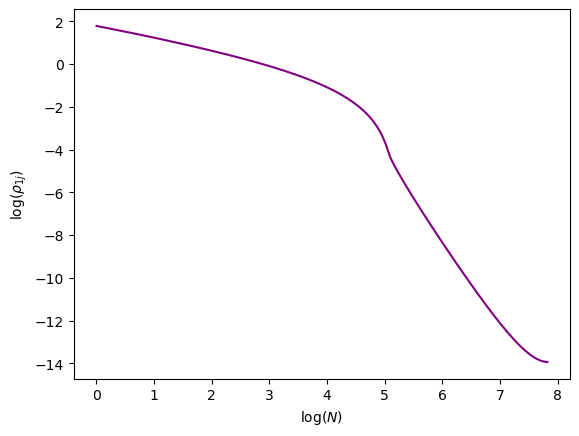

PyObject Text(0.5, 28.0, '$\\log(N)$')

In [99]:
x = log.(1:1:Nsites/2)
y = log.(abs.(wk)[2501:5000])
line1=PyPlot.plot(x, y,label="sdsdsds",color=:purple)
PyPlot.ylabel(L"\log(\rho_{1j})")
PyPlot.xlabel(L"\log(N)")

In [107]:
(log(abs(wk[2500+1100])/abs(wk[2500+400])))/(log(1100/400))

-3.773665778672331

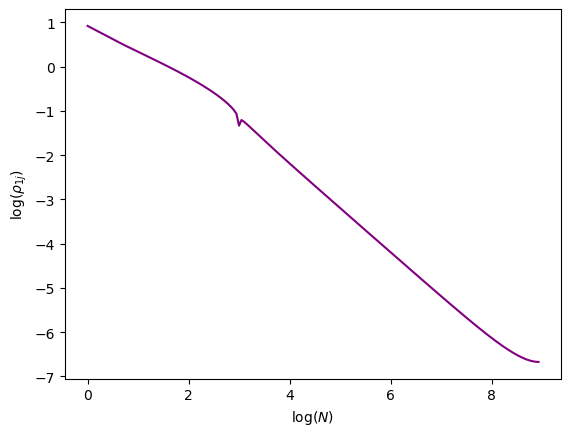

PyObject Text(0.5, 28.0, '$\\log(N)$')

In [122]:
x = log.(1:1:Nsites/2)
y = log.(abs.(wk)[Int(Nsites/2)+1:Nsites])
line1=PyPlot.plot(x, y,label="sdsdsds",color=:purple)
PyPlot.ylabel(L"\log(\rho_{1j})")
PyPlot.xlabel(L"\log(N)")

In [121]:
Int(Nsites*0.5)

7500